In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tabulate import tabulate

LLAMA_3_LATEST = "llama3:latest"
GEMMA3 = "gemma3:4b"

LLAMA_3_TRANSLATIONESE_PATH = Path("experiments/baseline/LLAMA_3_translationese.jsonl")
GEMMA_3_TRANSLATIONESE_PATH = Path("experiments/baseline/GEMMA_3_translationese.jsonl")

llama_3_records = [json.loads(l) for l in open(LLAMA_3_TRANSLATIONESE_PATH, "r", encoding="utf8")]
gemma_3_records = [json.loads(l) for l in open(GEMMA_3_TRANSLATIONESE_PATH, "r", encoding="utf8")]

In [3]:
llama_3_ppls = np.array([rec["ppl"] for rec in llama_3_records])
gemma_3_ppls = np.array([rec["ppl"] for rec in gemma_3_records])

print(llama_3_ppls[:10])
print(gemma_3_ppls[:10])

[ 5.47304395  6.84990966  5.55941543  5.20498757 13.61227133 14.77906357
 34.51629963  7.64079841  9.61361436  8.48750924]
[ 4.68399913  6.64308684  4.0576733   4.50879621 13.41530165  8.37485604
 38.0094309   6.8915396   7.93227609  7.99350816]


In [6]:
def describe(arr):
    return {
        "mean": float(np.mean(arr)),
        "median": float(np.median(arr)),
        "std": float(np.std(arr)),
        "min": float(np.min(arr)),
        "max": float(np.max(arr)),
        "p90": float(np.percentile(arr, 90)),
        "p95": float(np.percentile(arr, 95)),
        "p99": float(np.percentile(arr, 99)),
    }

ppl_stats = describe(llama_3_ppls)
headers = ["Metric", "Value"]
rows = [(k, round(v, 2)) for k, v in ppl_stats.items()]

print(tabulate(rows, headers=headers, tablefmt="github"))

| Metric   |   Value |
|----------|---------|
| mean     |   19.39 |
| median   |   11.87 |
| std      |   71.87 |
| min      |    3.39 |
| max      | 2883.04 |
| p90      |   29.88 |
| p95      |   43.44 |
| p99      |  127.84 |


In [5]:
gemma_3_ppl_stats = describe(gemma_3_ppls)
headers = ["Metric", "Value"]
rows = [(k, round(v, 2)) for k, v in gemma_3_ppl_stats.items()]

print(tabulate(rows, headers=headers, tablefmt="github"))

| Metric   |   Value |
|----------|---------|
| mean     |   12.87 |
| median   |    8.78 |
| std      |   25.27 |
| min      |    1.86 |
| max      |  831.06 |
| p90      |   20.12 |
| p95      |   29.54 |
| p99      |   75.43 |


In [7]:
records_sorted = sorted(llama_3_records, key=lambda r: r["ppl"], reverse=True)

n = 10
for rec in records_sorted[:n]:
    print("SRC:", rec["src"])
    print("REF:", rec["ref"])
    print("MT :", rec["mt"])
    print("PPL:", rec["ppl"])
    print("-" * 80)

SRC: Yes, Chinatown
REF: Da, Chinatown
MT : Da, Chinoisele
PPL: 2883.038181595625
--------------------------------------------------------------------------------
SRC: Cluster bombs!
REF: Bombe cu dispersie!
MT : Bombelor de rachet!
PPL: 754.1740871449384
--------------------------------------------------------------------------------
SRC: Take a breath.
REF: Respirați adânc.
MT : Suflete!
PPL: 663.9096408299769
--------------------------------------------------------------------------------
SRC: He teaches violin at the Musikhochschule of Sarrebruck, Germany.
REF: Preda cursuri de vioara la Musikhochschule din Sarrebruck, Germania.
MT : El preda la vioară la Muzika Hochschule din Sarrebrück, Germania.
PPL: 444.45252446431573
--------------------------------------------------------------------------------
SRC: LAX-C probably has it.
REF: Probabil că găsiți la LAX-C.
MT : Probabil LAX-C are are de acela.
PPL: 318.2162156888947
------------------------------------------------------------

In [8]:
for rec in records_sorted[-10:]:
    print("SRC:", rec["src"])
    print("REF:", rec["ref"])
    print("MT :", rec["mt"])
    print("PPL:", rec["ppl"])
    print("-" * 80)

SRC: The largest increases were reported in Latvia (7.9%), Romania (7.7%), Bulgaria (6.8%), Estonia (5.5%) and Lithuania (4.3%).
REF: Cele mai mari cresteri au fost raportate în Letonia (7,9%), Romania (7,7%), Bulgaria (6,8%), Estonia (5,5%) și Lituania (4,3%).
MT : Cele mai mari creșteri au fost raportate în Letonia (7,9%), România (7,7%), Bulgaria (6,8%), Estonia (5,5%) și Lituania (4,3%).
PPL: 3.754967334694726
--------------------------------------------------------------------------------
SRC: For some products, such as TVs and washing machines, more than one third of purchases are now done through web stores.
REF: În cazul anumitor produse, cum ar fi televizoarele și mașinile de spălat, mai mult de o treime din achiziții se realizează în prezent prin intermediul magazinelor online.
MT : Pentru anumite produse, cum ar fi televizoarele și mașinile de spălat rufe, mai mult de un sfert dintre cumpărăturile efectuate în prezent sunt făcute prin intermediul magazinelor online.
PPL: 3.6

Correlation between sentence length and PPL: -0.1335853551494939


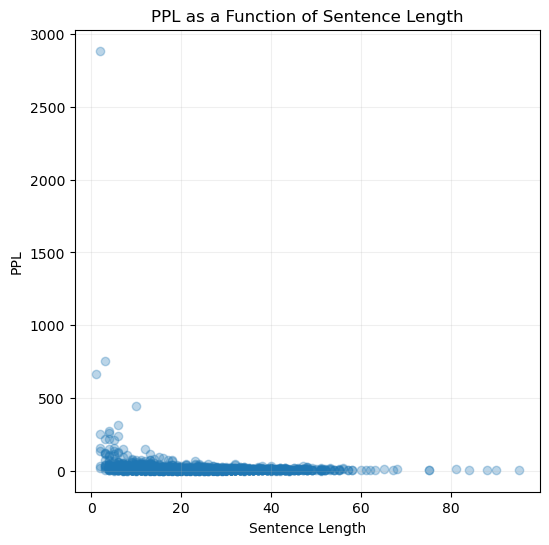

In [10]:
lengths = np.array([len(rec["mt"].split()) for rec in records])
corr = np.corrcoef(lengths, llama_3_ppls)[0,1]

print("Correlation between sentence length and PPL:", corr)

plt.figure(figsize=(6,6))
plt.scatter(lengths, llama_3_ppls, alpha=0.3)
plt.xlabel("Sentence Length")
plt.ylabel("PPL")
plt.title("PPL as a Function of Sentence Length")
plt.grid(alpha=0.2)
plt.show()

In [7]:
# ----------------------------------------------
# 1. Imports
# ----------------------------------------------
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LLAMA_3_TRANSLATIONESE_PATH = Path("experiments/baseline/LLAMA_3_translationese.jsonl")
GEMMA_3_TRANSLATIONESE_PATH = Path("experiments/baseline/GEMMA_3_translationese.jsonl")

# ----------------------------------------------
# 2. Load the records
# ----------------------------------------------
def load_jsonl(path):
    with open(path, "r", encoding="utf8") as f:
        return [json.loads(line) for line in f]

llama_3_records = load_jsonl(LLAMA_3_TRANSLATIONESE_PATH)
gemma_3_records = load_jsonl(GEMMA_3_TRANSLATIONESE_PATH)

print(len(llama_3_records), "LLAMA-3 records")
print(len(gemma_3_records), "GEMMA-3 records")

# ----------------------------------------------
# 3. Convert to DataFrame for easier analysis
# ----------------------------------------------
df_llama = pd.DataFrame(llama_3_records)
df_gemma = pd.DataFrame(gemma_3_records)

df_llama["model"] = "llama3"
df_gemma["model"] = "gemma3"

df_all = pd.concat([df_llama, df_gemma], ignore_index=True)

df_all.head()


1994 LLAMA-3 records
1994 GEMMA-3 records


,src,ref,mt,ppl,tsr,spans,model
0,UN Chief Says There Is No Military Solution in...,Șeful ONU declară că nu există soluții militar...,Șeful ONU spune că nu există o soluție militar...,5.473044,0.0,[],llama3
1,Secretary-General Ban Ki-moon says his respons...,Secretarul General Ban Ki-moon afirmă că răspu...,Secretarul general Ban Ki-mun spune că răspuns...,6.849910,0.0,[],llama3
2,"The U.N. chief again urged all parties, includ...",Șeful ONU a solicitat din nou tuturor părților...,Şeful O.N.U.-ului a încercat din nou să convin...,5.559415,0.0,[],llama3
3,Ban told a news conference Wednesday that he p...,Ban a declarat miercuri în cadrul unei conferi...,Banul a declarat la o conferință de presă marț...,5.204988,0.0,[],llama3
4,He expressed regret that divisions in the coun...,Ban și-a exprimat regretul că divizările în co...,El a exprimat remușcarea că împărțirile în con...,13.612271,0.0,[],llama3


In [8]:
# PPL summary statistics
desc = df_all.groupby("model")["ppl"].describe()
desc


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
gemma3,1994.0,12.869854,25.275298,1.858015,6.452954,8.779981,12.741216,831.060027
llama3,1994.0,19.386485,71.886799,3.394296,8.172792,11.868681,17.404039,2883.038182


In [11]:
paired = pd.DataFrame({
    "src": [r["src"] for r in llama_3_records],
    "llama_ppl": df_llama["ppl"].values,
    "gemma_ppl": df_gemma["ppl"].values
})

paired["delta"] = paired["gemma_ppl"] - paired["llama_ppl"]
paired.head()


,src,llama_ppl,gemma_ppl,delta
0,UN Chief Says There Is No Military Solution in...,5.473044,4.683999,-0.789045
1,Secretary-General Ban Ki-moon says his respons...,6.849910,6.643087,-0.206823
2,"The U.N. chief again urged all parties, includ...",5.559415,4.057673,-1.501742
3,Ban told a news conference Wednesday that he p...,5.204988,4.508796,-0.696191
4,He expressed regret that divisions in the coun...,13.612271,13.415302,-0.196970


## Inspect the highest-PPL cases

In [13]:
def show_examples(df, n=5):
    worst = df.sort_values("ppl", ascending=False).head(n)
    for _, row in worst.iterrows():
        print("="*80)
        print("SRC:", row["src"])
        print("REF:", row["ref"])
        print("MT :", row["mt"])
        print("PPL:", row["ppl"])

print("Worst 5 LLAMA-3 outputs:")
show_examples(df_llama)

print("\nWorst 5 GEMMA-3 outputs:")
show_examples(df_gemma)

Worst 5 LLAMA-3 outputs:
SRC: Yes, Chinatown
REF: Da, Chinatown
MT : Da, Chinoisele
PPL: 2883.038181595625
SRC: Cluster bombs!
REF: Bombe cu dispersie!
MT : Bombelor de rachet!
PPL: 754.1740871449384
SRC: Take a breath.
REF: Respirați adânc.
MT : Suflete!
PPL: 663.9096408299769
SRC: He teaches violin at the Musikhochschule of Sarrebruck, Germany.
REF: Preda cursuri de vioara la Musikhochschule din Sarrebruck, Germania.
MT : El preda la vioară la Muzika Hochschule din Sarrebrück, Germania.
PPL: 444.45252446431573
SRC: LAX-C probably has it.
REF: Probabil că găsiți la LAX-C.
MT : Probabil LAX-C are are de acela.
PPL: 318.2162156888947

Worst 5 GEMMA-3 outputs:
SRC: Cluster bombs!
REF: Bombe cu dispersie!
MT : Bombe clustrate!

PPL: 831.0600265541336
SRC: CF Candidate Profile
REF: Profilul candidatului TdC
MT : Profil Candidat CF
PPL: 387.78280581168144
SRC: Marco Rubio with only 21 percent.
REF: Marco Rubio, cu doar 21%.
MT : Marco Rubio cu doar 21%.
PPL: 239.74288844205208
SRC: Temporar